* I : Exploration

In [41]:
Data <- read.csv(file.path("..","data","training_data.csv"))
Data <- na.omit(Data)
dim(Data)
head(Data)

[1]  708 4872

,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


* Look at pleansantness vs Intensity

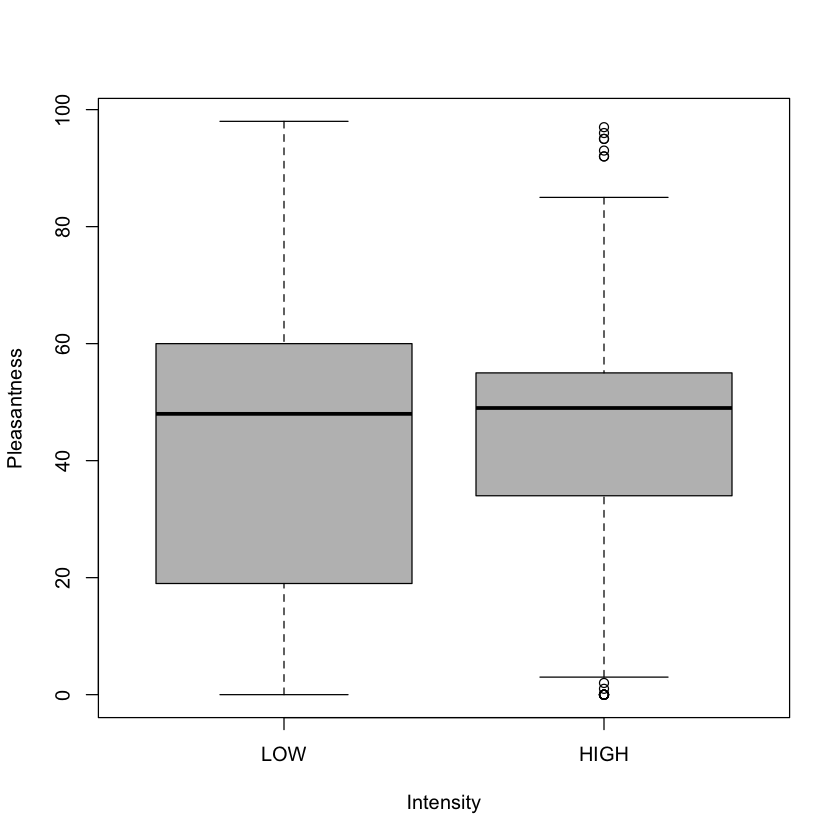

In [42]:
plot(Data$Intensity, Data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("LOW","HIGH"))


*INTERPRETATION*
On peut observer que les odeur avec une intensity sont moyennement plaisante : entre 30/50
Tandis que les odeurs sans intensité sont tout autant peu plaisante que très plaisante. 


Change the Low, high Intensity value to binary value (low=0 and high =1)

In [43]:
lookup <- c("low" = 1, "high" = 0)
Data$Intensity <- lookup[Data$Intensity]
head(Data)


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,1,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


* let's look at somes data

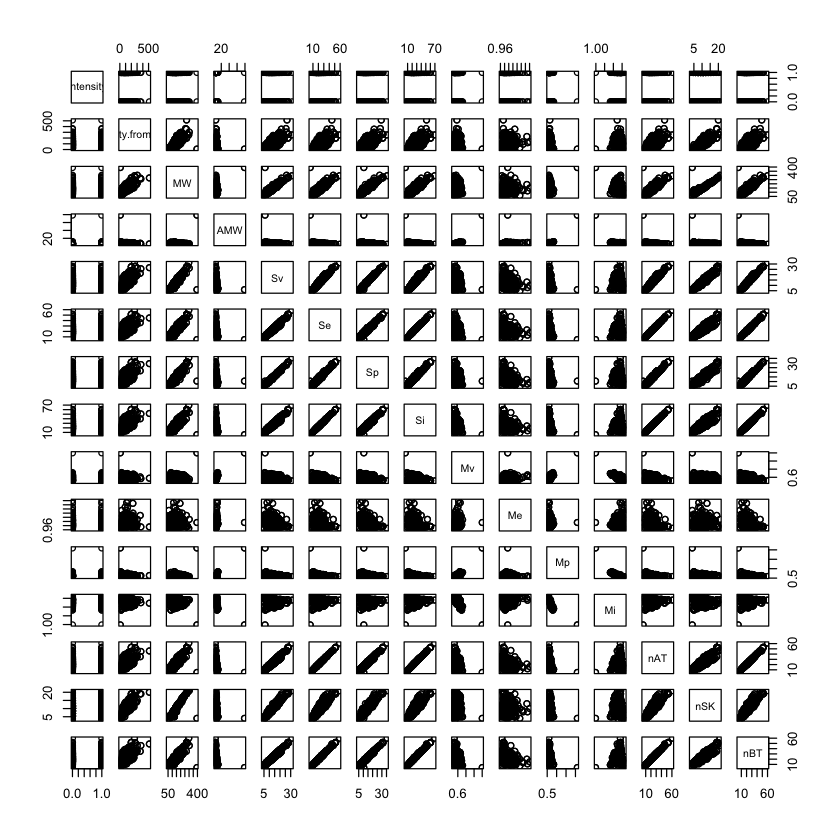

In [67]:
Data.x<-Data[, c(-2, -3)]
pairs(Data.x[, (1:15)] )

--> we can see some linear interaction bewteem SV, Se, Sp and Si, MW , nAT, nSK, nBTand Complexity from pubmed

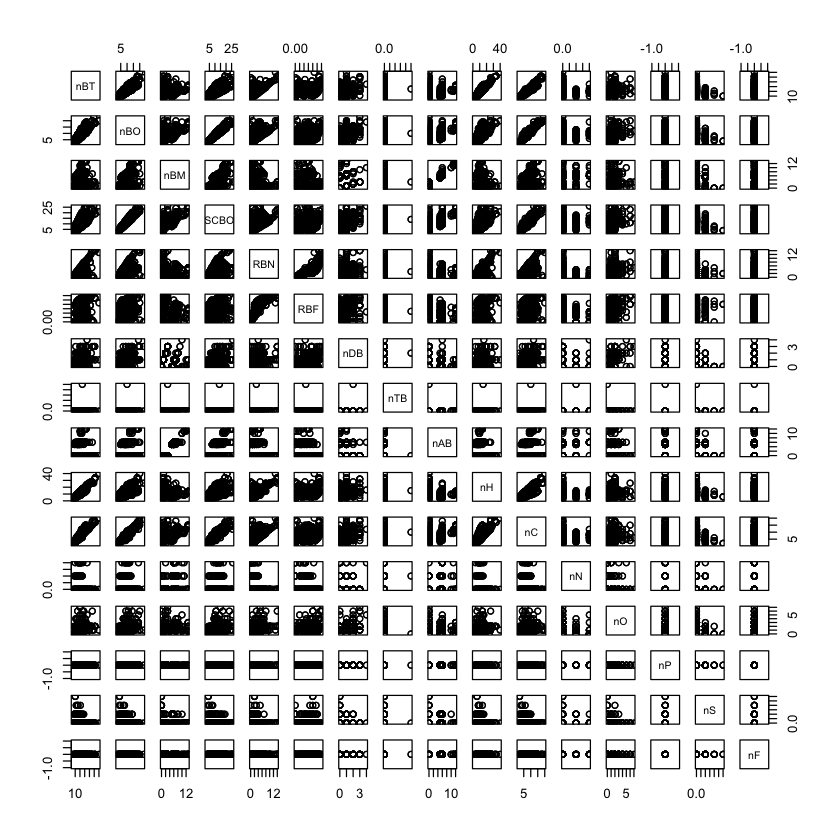

In [68]:
pairs(Data.x[, 15:30])

--> we can see some linear interaction bewteem nBT, nBO, SCBC, nH, nC

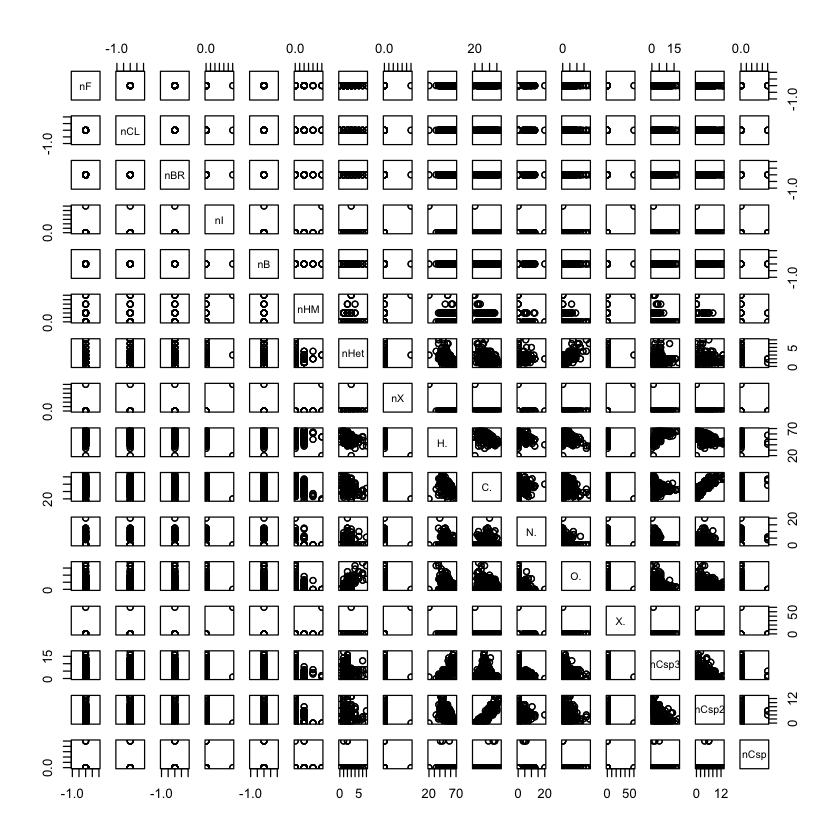

In [69]:
pairs(Data.x[, 30:45])

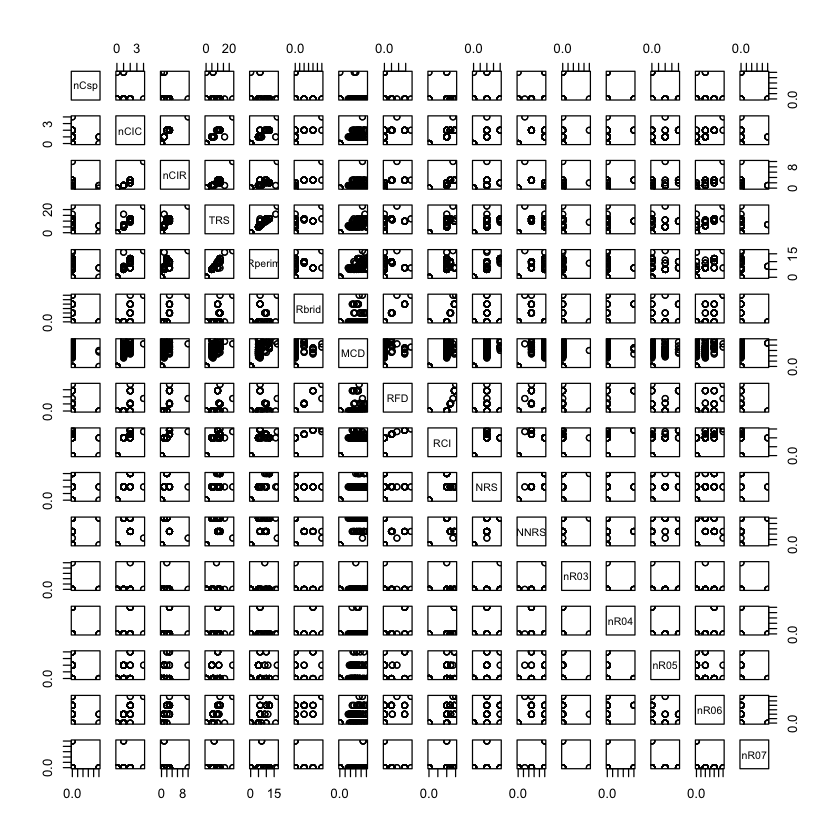

In [70]:
pairs(Data.x[, 45:60])

Parmis seulement 60 predictors on remarque que peu ont des relations lineaire.. 
Faisons d'abord un trie sur nos data afin de reduire le nombre de predictor.
Analyse statistique des données : on enleves les predictors dont la variance vaux 0 (colonnes constante donc aucun effet sur notre prediction), les collones corrélés, et normalisons nos données

In [44]:

library(caret)


data <- Data[, which(apply(Data, 2, var)!=0)] 

cormat<- cor(data)
highly_corr <- findCorrelation(cormat, 0.9)
data <- data[,-c(highly_corr)]
data_final<-data[, -3]
data_final<-as.data.frame(scale(data_final)) # normalization 

dim(data_final)
head(data_final)



[1] 708 852

,Intensity,VALENCE.PLEASANTNESS,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.9992935,0.06138675,-0.04988752,-0.2621597,1.3212848,0.06221626,-0.2921431,2.4449733,5.4540804,-0.03056319,⋯,-0.210203,-0.07532458,4.1960309,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
2,0.9992935,0.23351276,-0.71975646,-0.9580438,-1.1275886,-0.89537315,-0.3624004,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
3,0.9992935,0.53473329,-1.32872823,0.2297583,0.0968481,1.01980567,0.3577364,1.3724571,-0.2222699,0.99985297,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,-0.07532458,1.478546,10.80901225
4,0.9992935,-1.57381039,1.04626166,-0.6700918,0.0968481,0.06221626,1.2183877,-0.7725752,-0.2222699,-1.06097935,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,-0.9992935,0.31957577,-0.53706493,-0.5021197,-1.1275886,-0.89537315,-0.5029149,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,0.9992935,-0.97136934,-0.41527058,0.8056624,0.0968481,0.06221626,-0.1165000,0.2999410,-0.2222699,0.99985297,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472


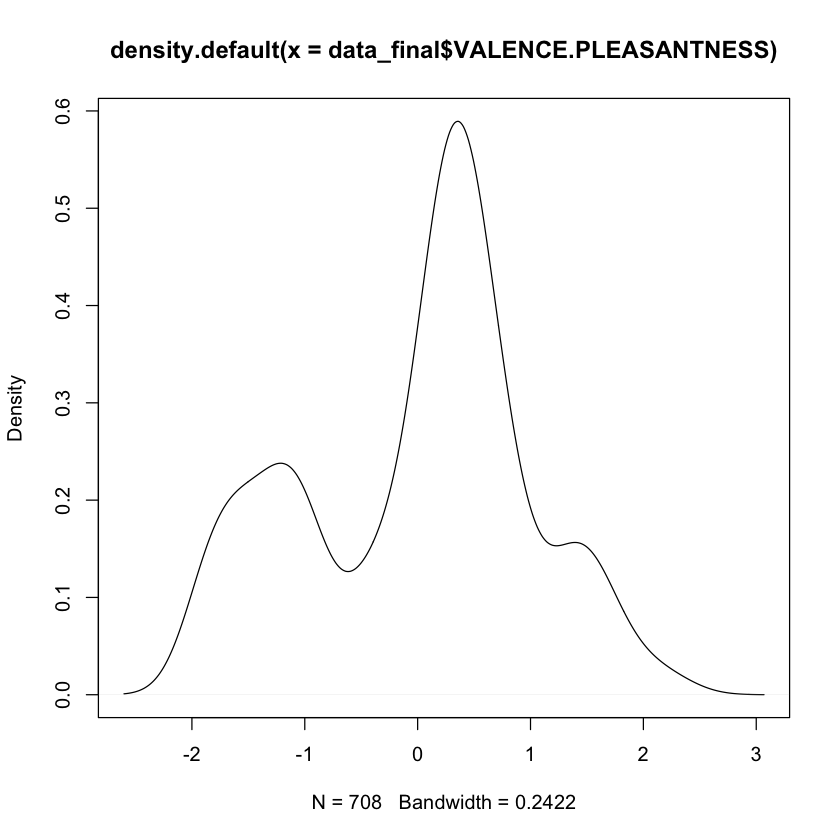

In [45]:
plot(density(data_final$VALENCE.PLEASANTNESS))


--> pleasantness does not have a Gaussian curve shape .. it may be difficult to find a linear regression 

* II : LINEAR METHODE 

* Créeons 2 subset

In [5]:
#creation train/test set

set.seed(1)

data.x<-(data_final[, -2])

data.y<-(data_final$VALENCE.PLEASANTNESS)
data<-cbind(data.y, data.x)

idx.train <- sample(nrow(data_final), nrow(data_final)*1/2)
X.train<- data.x[idx.train, ]
idx.zero.var <- apply(X.train, 2, var) ==0 # identify col with 0 variance 
data.train.x <- data.frame(X.train[, !idx.zero.var]) 


#c<-cor(data.train.x)
#corr <- findCorrelation(c, 0.7)
#data.train.x<-data.train.x[, -c(corr)]

data.train.y<-data.y[idx.train]
data.train<-cbind(pleasantness=data.train.y, data.train.x)


X.test<- data.x[-idx.train, ]
data.test.x <- data.frame(X.test[, !idx.zero.var]) 
#c<-cor(data.test.x)
#corr <- findCorrelation(c, 0.7)
#data.test.x<-data.test.x[, -c(corr)]

data.test.y<-data.y[-idx.train]
data.test<-(cbind(pleasantness=data.test.y, data.test.x))


head(data.train)
head(data.test)

dim(data.train)

dim(data.test)

,pleasantness,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
679,0.23351276,-0.9992935,0.4981871,1.6815165,0.0968481,-0.89537315,-0.7839439,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
129,0.40563878,-0.9992935,0.9244673,1.0096284,-1.1275886,-0.89537315,-0.5556078,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
509,0.01835525,-0.9992935,-0.9024480,-0.5501117,0.0968481,-0.89537315,-0.5380435,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
471,-0.02467626,-0.9992935,-1.3287282,-0.8860558,0.0968481,-0.89537315,-0.2570145,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
299,0.14744976,0.9992935,-0.4152706,-0.9580438,0.0968481,0.06221626,-0.3624004,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
270,0.79292231,0.9992935,-0.4152706,-0.9940378,-1.1275886,0.06221626,0.4631223,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472


,pleasantness,Intensity,Mi,RBF,nDB,nHet,O.,nCIR,RFD,NNRS,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,-1.5738104,0.9992935,1.0462617,-0.6700918,0.0968481,0.06221626,1.2183877,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
5,0.3195758,-0.9992935,-0.5370649,-0.5021197,-1.1275886,-0.89537315,-0.5029149,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
6,-0.9713693,0.9992935,-0.4152706,0.8056624,0.0968481,0.06221626,-0.1165000,0.2999410,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,2.5539556,-0.07532458,1.478546,-0.09238472
7,0.5347333,-0.9992935,-1.9985972,-0.5981038,-1.1275886,-0.89537315,-0.5380435,1.3724571,-0.2222699,0.999853,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,2.1071008,-0.1312137,-0.3909965,-0.07532458,1.478546,-0.09238472
8,0.3626073,-0.9992935,0.7417758,0.8056624,-1.1275886,-1.85296256,-1.2933090,-0.7725752,-0.2222699,-1.060979,⋯,-0.210203,-0.07532458,-0.2379838,-0.05318703,-0.4739154,-0.1312137,-0.3909965,-0.07532458,-0.675385,-0.09238472
9,0.4056388,-0.9992935,0.5590842,-0.2261657,3.7701582,4.85016332,1.2183877,0.2999410,-0.2222699,0.999853,⋯,4.750587,-0.07532458,4.1960309,-0.05318703,2.1071008,7.6103928,2.5539556,13.25712685,1.478546,10.80901225


[1] 354 845

[1] 354 845

Essayons subset selection avec foward method pour reduire encore nos predictor

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“595  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”


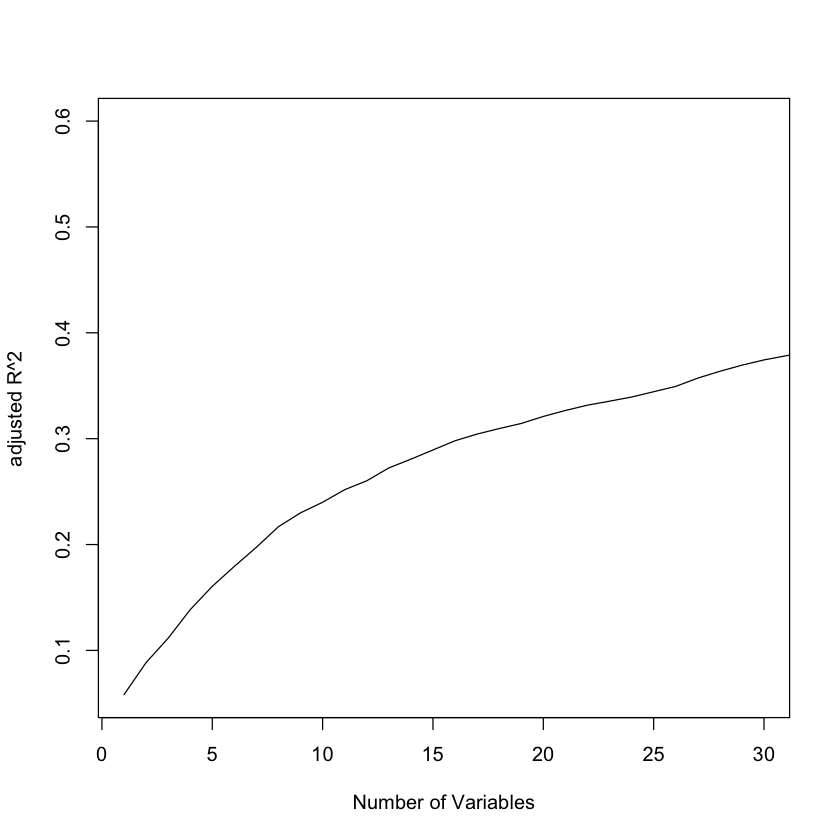

In [80]:
library(leaps)
regfit.fwd <- regsubsets(pleasantness~ ., data.train, method = "forward", nvmax = 350)
regfit.fwd.summary <- summary(regfit.fwd)
# plot
plot(regfit.fwd.summary$adjr2, type = "l", xlim = c(1,30),
     xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.fwd.summary$adjr2)
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

--> R trop bas, ne prenons pas les données issus de la regression

checkons linear regression with the 845 predictor

In [88]:
    
fit1<-lm(pleasantness~., data.train)
#summary(fit1)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data[, 1]- predict(fit, data))^2)
    TSS <- sum((data[, 1]- mean(data[, 1]))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

#quality.of.fit(fit1, data.train)
#quality.of.fit(fit1, data.test)



#Creeons un submodel avec peu de predictor :


ERROR: Error in `[.data.frame`(data.train, , "MW"): undefined columns selected


--> l'algorithme ne converge pas.. Essaysons lassos regularization or PCA 

Loading required package: Matrix

Loaded glmnet 4.0-2



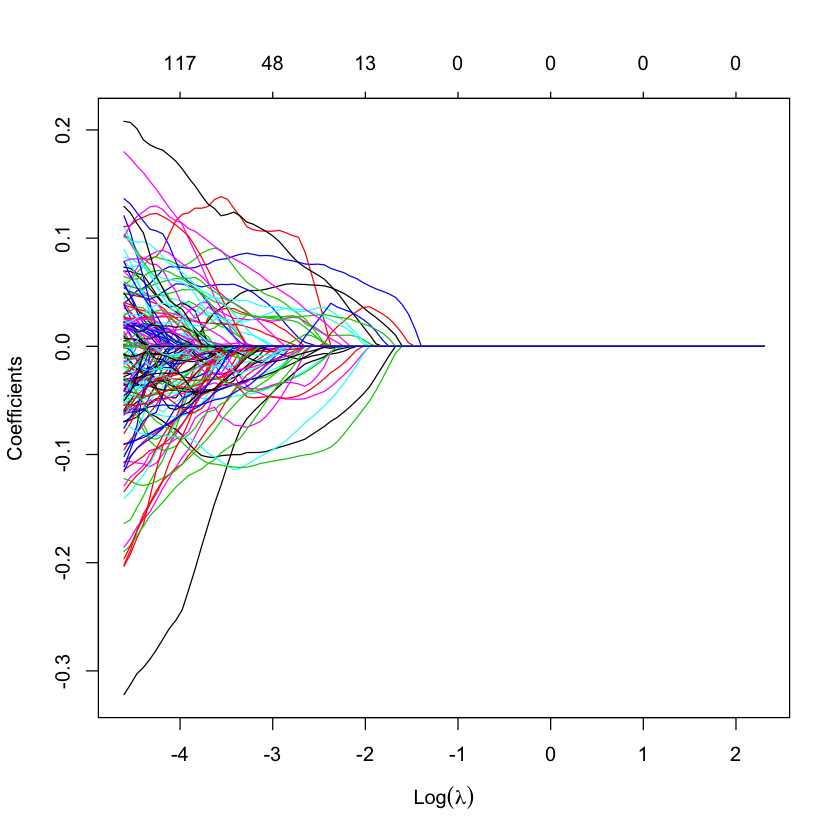

In [100]:
#L1 Regularization

library(glmnet)
grid =10^seq(1, -2, length = 100)

x.train<-as.matrix(data.train.x)
x.test<-as.matrix(data.test.x)

lasso.mod <- glmnet(x.train, data.train.y, alpha = 1, lambda = grid)
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

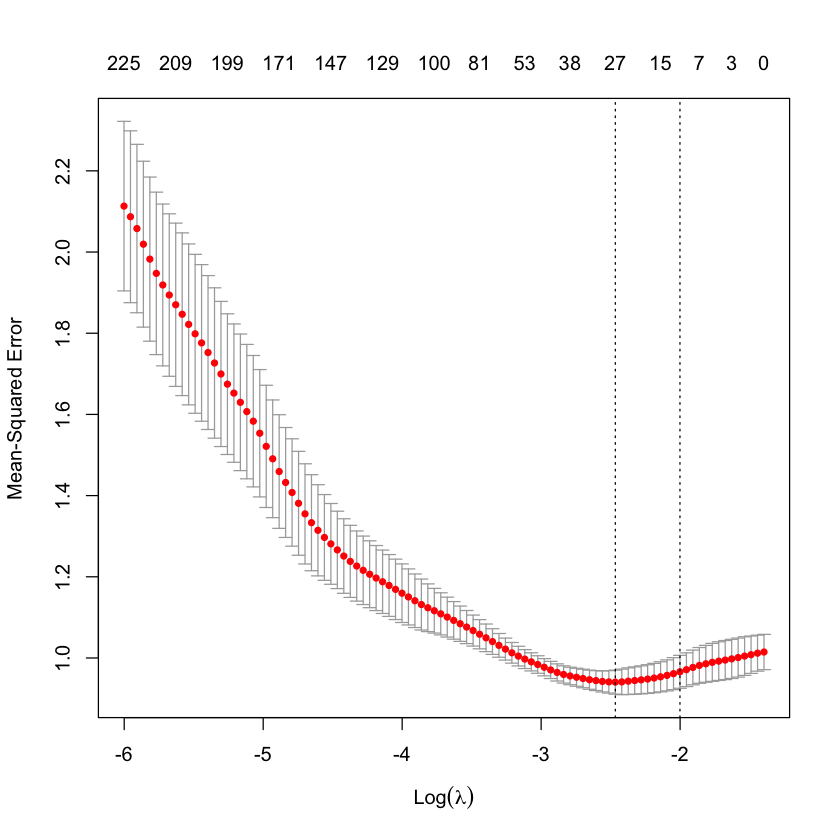

In [101]:
cv.lasso <- cv.glmnet(x.train, data.train.y, alpha = 1, nfold = 5)
plot(cv.lasso)

In [102]:
best.lasso <- glmnet(x.train, data.train.y, alpha = 1, lambda = cv.lasso$lambda.min)
bestlam = cv.lasso$lambda.min
lasso_pred1=predict(lasso.mode, s=bestlam, newx = x.train)
lasso_pred = predict(lasso.mod, s = bestlam, newx = x.test)
mean((lasso_pred1 .- data.train.y)^2)
mean((lasso_pred-data.test.y)^2)

[1] 0.8964184

**INTERPRETATION :**


The resitual standard error is a little bit smaller than with multilinear regression on submodels, but is still quite high. 

In [25]:
#LASSO L2-REGULARIZATION 

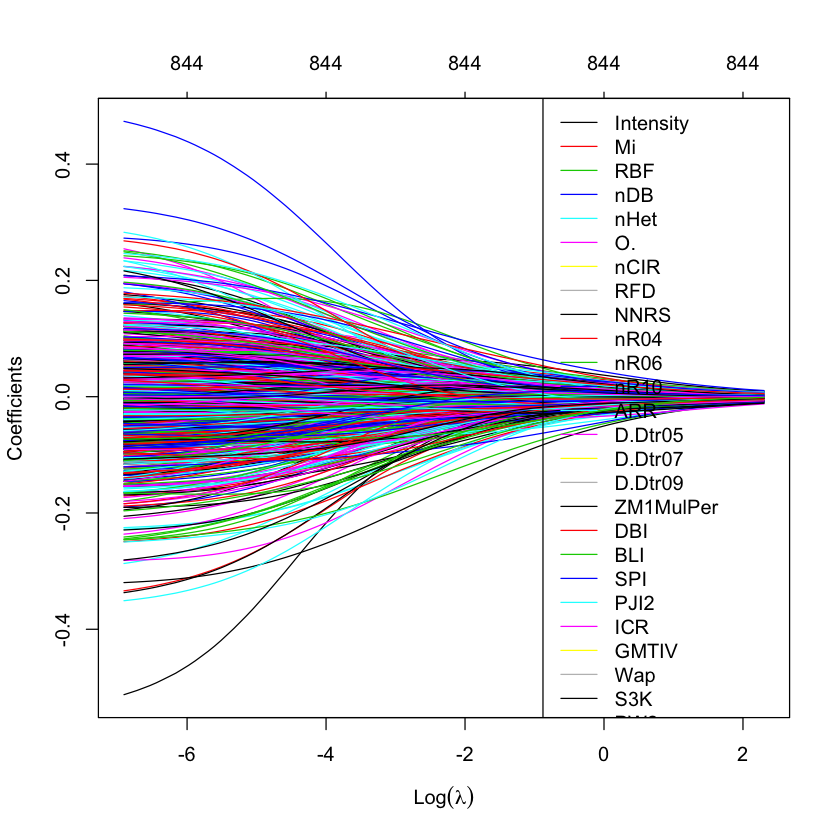

In [103]:

ridge.mod <- glmnet(x.train, data.train.y, alpha = 0, lambda = 10^seq(1, -3, length = 100))
plot(ridge.mod, "lambda", xlab = parse(text = "Log(lambda)"))
labs = names(ridge.mod$beta[,1]) # extract labels
legend('topright', legend=labs, col=1:length(labs), lty=1) # show legend with labels

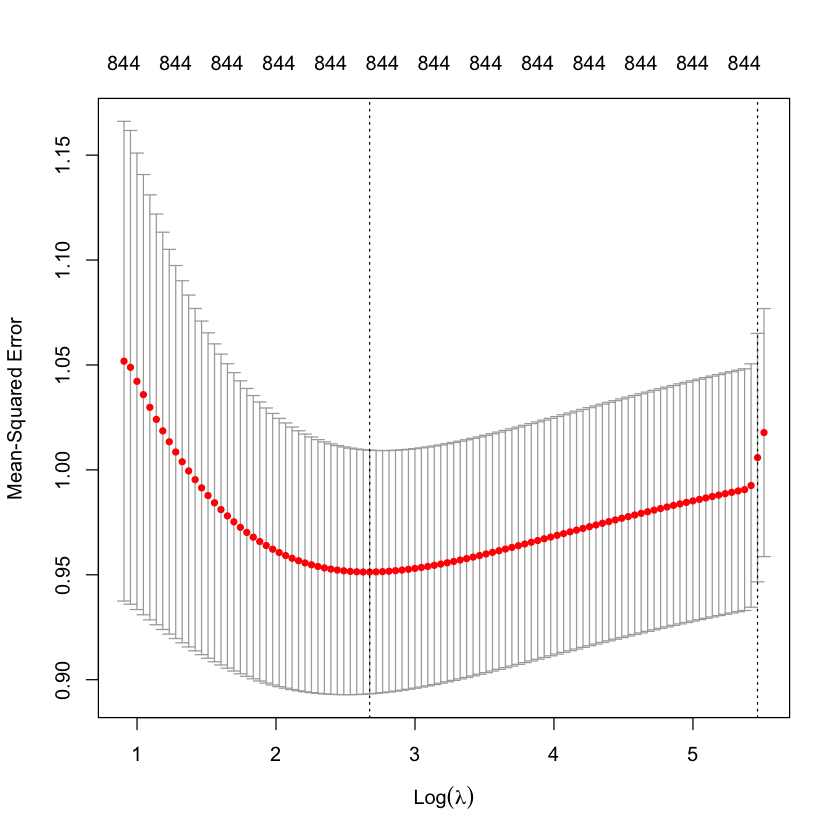

In [104]:
cv.lasso2 <- cv.glmnet(x.train, data.train.y,  alpha = 0, nfold = 50)
plot(cv.lasso2)


In [105]:
bestlam2 = cv.lasso2$lambda.min
best.lasso.1se <- glmnet(x.train, data.train.y, alpha = 0, lambda = bestlam2)


In [106]:
ridge_pred1 = predict(ridge.mod,  s = bestlam, newx = x.train)
ridge_pred = predict(ridge.mod,  s = bestlam, newx = x.test)
mean((ridge_pred1-data.train.y)^2)
mean((ridge_pred-data.test.y)^2)


[1] 1.066901

--> lasso donne meilleur resultats 

MSE is still high.. let's perfom PCA 

In [107]:
prin_comp <- prcomp(data.train.x, scale. = T)
summary(prin_comp)

Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     11.4907 9.5568 8.28188 6.59664 5.68290 5.10259 4.93991
Proportion of Variance  0.1564 0.1082 0.08127 0.05156 0.03826 0.03085 0.02891
Cumulative Proportion   0.1564 0.2647 0.34592 0.39748 0.43575 0.46660 0.49551
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.66841 4.42823 4.20385 3.96953 3.86270 3.50329 3.45779
Proportion of Variance 0.02582 0.02323 0.02094 0.01867 0.01768 0.01454 0.01417
Cumulative Proportion  0.52133 0.54456 0.56550 0.58417 0.60185 0.61639 0.63056
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     3.33979 3.25089 3.09279 3.02391 2.9057 2.86720 2.81769
Proportion of Variance 0.01322 0.01252 0.01133 0.01083 0.0100 0.00974 0.00941
Cumulative Proportion  0.64377 0.65630 0.66763 0.67846 0.6885 0.69821 0.70761
                          PC22    

In [109]:
#add a training set with principal components
train.data <- data.frame(pleasantness = data.train.y, prin_comp$x)

#we are interested in first 60 PCAs

train.data <- train.data[,1:60]

linearmod<-lm(pleasantness ~., train.data)

#transform test into PCA


test.data <- predict(prin_comp, data.test)
test.data <- data.frame(pleasantness = data.test.y, test.data)


#select the first 60 components
test.data <- test.data[,1:60]


rpart.prediction <- predict(linearmod, test.data)


quality.of.fit <- function(fit, data) {
    RSS <- sum((data$pleasantness - predict(fit, data))^2)
    TSS <- sum((data$pleasantness- mean(data$pleasantness))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}

quality.of.fit(linearmod, train.data)
quality.of.fit(linearmod, test.data)


#training error  : 
1/length(train.data$pleasantness) * sum((train.data$pleasantness-rpart.prediction )^2)




Residual standard error:  0.92171416047173  R^2 =  0.299045397154683 
Residual standard error:  1.04265281009458  R^2 =  0.0880086704142322 


[1] 1.274407

--> lasso donne de meilleur resultat

* III : NON LINEAR METHOD (TREE)

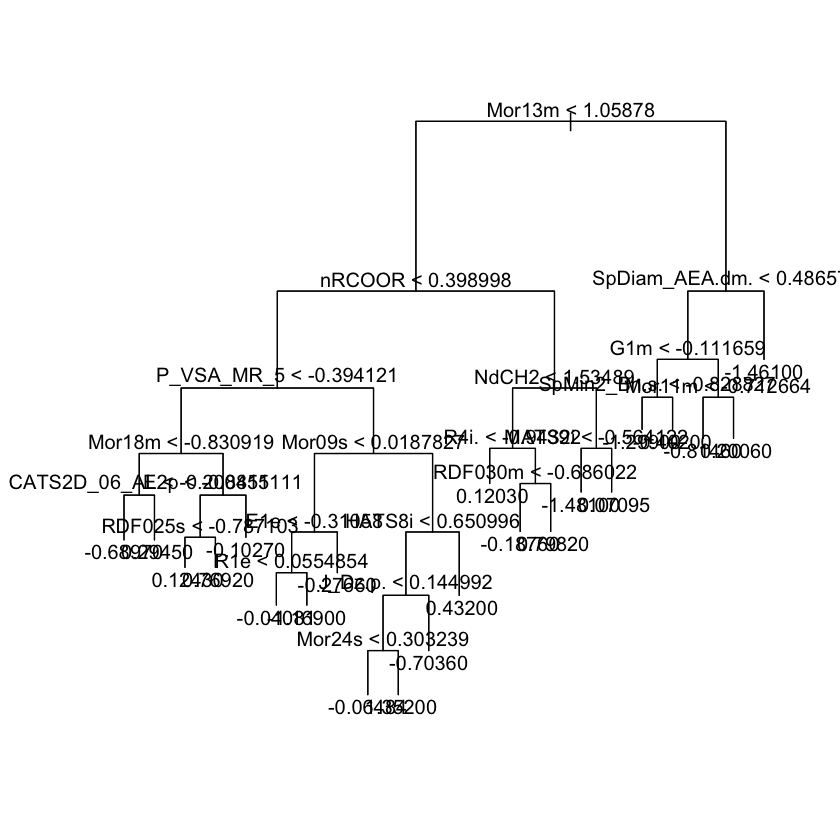

In [6]:
#DESCISION TREES 

library(tree)
p_tree <- tree(data.y ~ ., data, minsize = 1)
plot(p_tree)
text(p_tree)


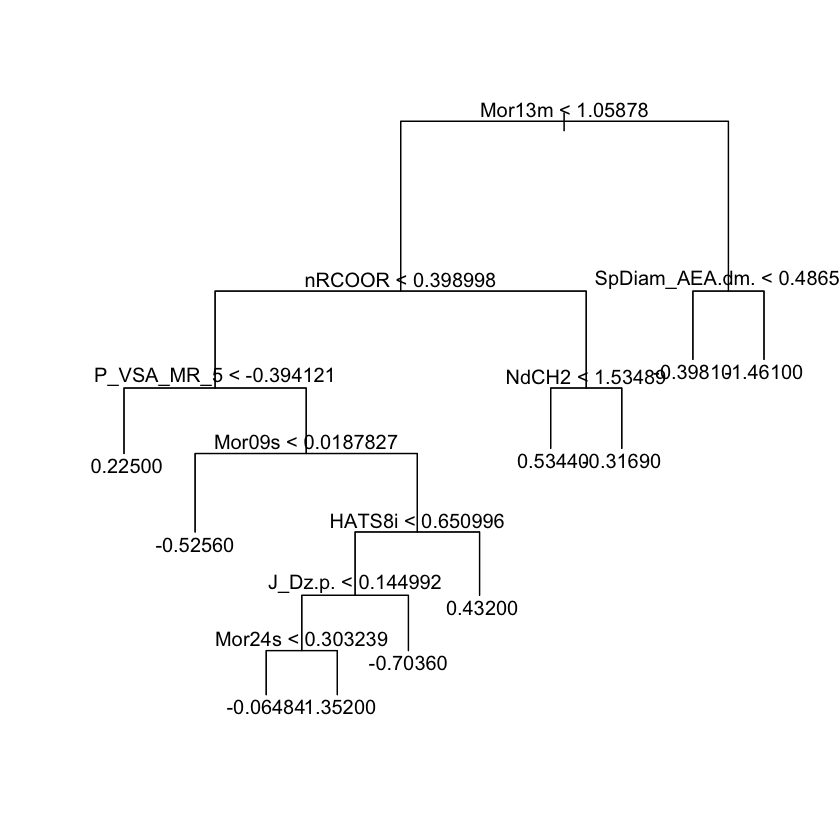

In [7]:
# prunned tree
prunned_p_tree <- prune.tree(p_tree, best = 10)
plot(prunned_p_tree)
text(prunned_p_tree)

In [112]:
dim(data)

[1] 708 852

In [8]:
p.train <- function(train) {
    tree(data.y ~ ., data, subset = train)
}

p.evaluate <- function(tree, set) {
    sapply(2:100, function(i) mean((data[set,'data.y']) - predict(prune.tree(tree, best = i), data[set,]))^2) # We compute the mean squared error for all trees with 5 to 20 leaf nodes.
}
p.cv <- function(train) {
    res <- sapply(1:6, function(v) {
                            idx.test <- seq((v-1)*71 + 1, v*71) # fold index
                            this.fold.test <- train[idx.test]   # validation
                            this.fold.train <- train[-idx.test] # training
                            tree <- p.train(this.fold.train)
                            p.evaluate(tree, this.fold.test)
                        })
    rowMeans(data.frame(res))
}
p.train.and.evaluate <- function() {
    train <- sample(nrow(data), 426)
    tree <- p.train(train)
    list(train = p.evaluate(tree, train),
         test = p.evaluate(tree, -train),
         cv = p.cv(train),
         tree = tree)
}
set.seed(1)
res <- replicate(3, p.train.and.evaluate())# we run everything for 3 different training sets
           


Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best is bigger than tree size”
Warning message in prune.tree(tree, best = i):
“best

Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, m - std, x, m + std, length = 0.05, angle = 90, code = 3, :
“zero-lengt

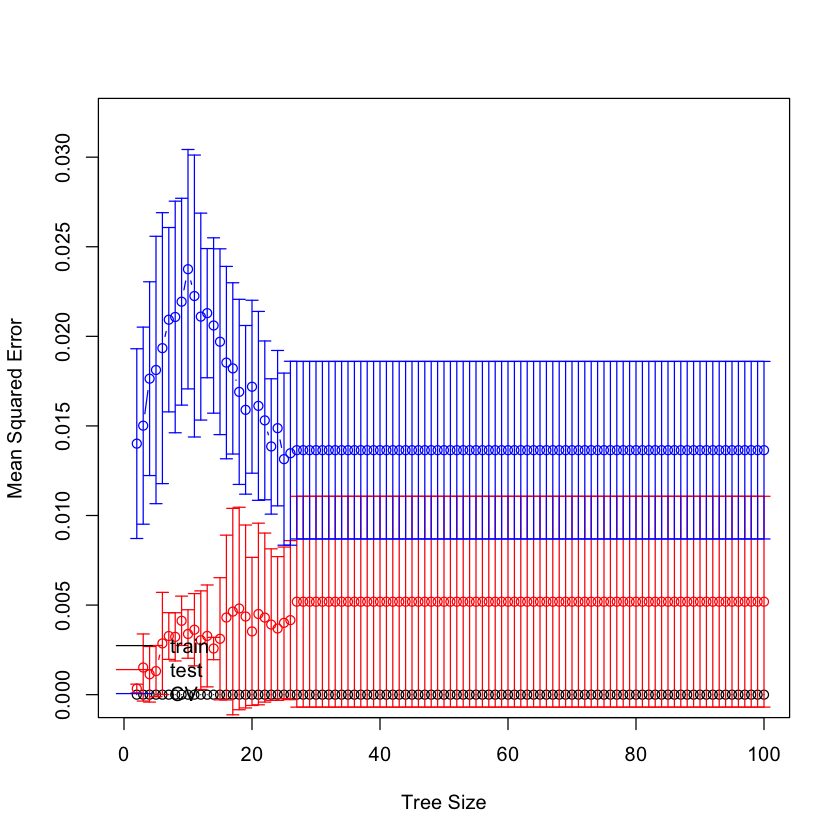

In [9]:
std.plot <- function(data, x = 2:100, ...) {
    df <- data.frame(data)
    m <- rowMeans(df)
    std <- sqrt(rowMeans((df - m)^2))
    points(x, m, type = "b", ...)
    arrows(x, m - std, x, m + std, length=0.05, angle = 90,  code=3, ...)
}
plot(c(),ylim = c(0,0.032), xlim = c(0, 100), xlab = "Tree Size", ylab = "Mean Squared Error")
std.plot(res[1,])
std.plot(res[2,], col = "red")
std.plot(res[3,], col = "blue")
legend("bottomleft", c("train", "test", "CV"), bty = 'n',
                     col = c("black", "red", "blue"), lty = 1)


We can deduce from the plot above that the optimal tree size is around 22. 

ERROR: Error in res[1, 22]: indice hors limites


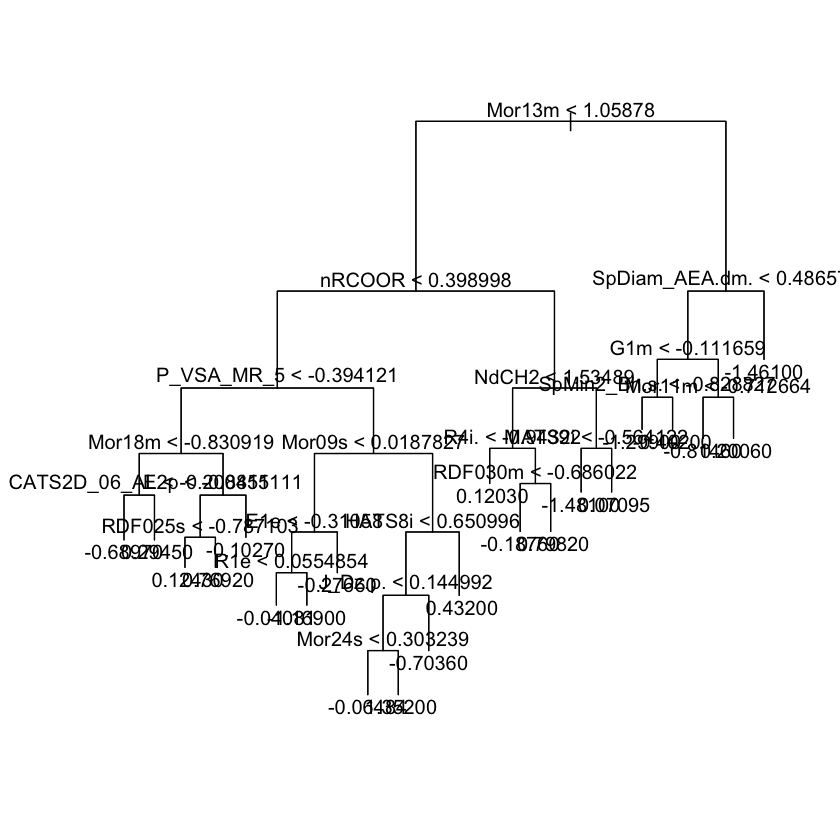

In [13]:
final.tree <- prune.tree(p_tree, best = 22)
plot(final.tree)
text(final.tree)



In [ ]:
#Bangging and random forest

In [17]:
library(xgboost)
library(Matrix)
plea.train.x <- sparse.model.matrix( pleasantness~ . -1, data = data.train)
plea.test.x = sparse.model.matrix(pleasantness ~ . -1, data = data.test)
plea.train.y =data.train.y
plea.test.y =data.test.y

In [ ]:
#testons pour des valeur differentes de eta pour boosting. 

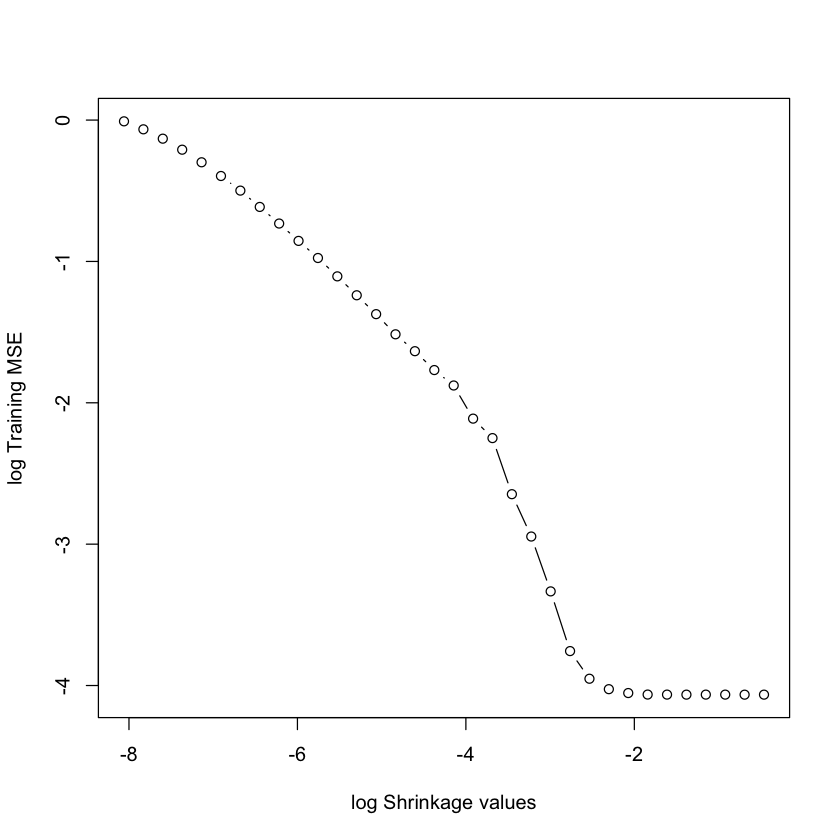

In [18]:
set.seed(1)
pows <- seq(-3.5, -0.2, by = 0.1)
lambdas <- 10^pows

for (i in 1:length(lambdas)) {
  boost.pleas <- xgboost(plea.train.x,
                           label=plea.train.y,
                           eta=lambdas[i],
                           objective="reg:squarederror",
                           max.depth=3,
                           nrounds=1000,
                           verbose = 0)
  pred.train <- predict(boost.pleas, plea.train.x)
  pred.test <- predict(boost.pleas, plea.test.x)
  train.err[i] <- mean((pred.train - plea.train.y)^2)
  test.err[i] <- mean((pred.test - plea.test.y)^2)
}
plot(log(lambdas), log(train.err), type="b", xlab="log Shrinkage values", ylab="log Training MSE")

In [19]:
min(train.err)
lambdas[which.min(train.err)]

[1] 0.017168

[1] 0.5011872

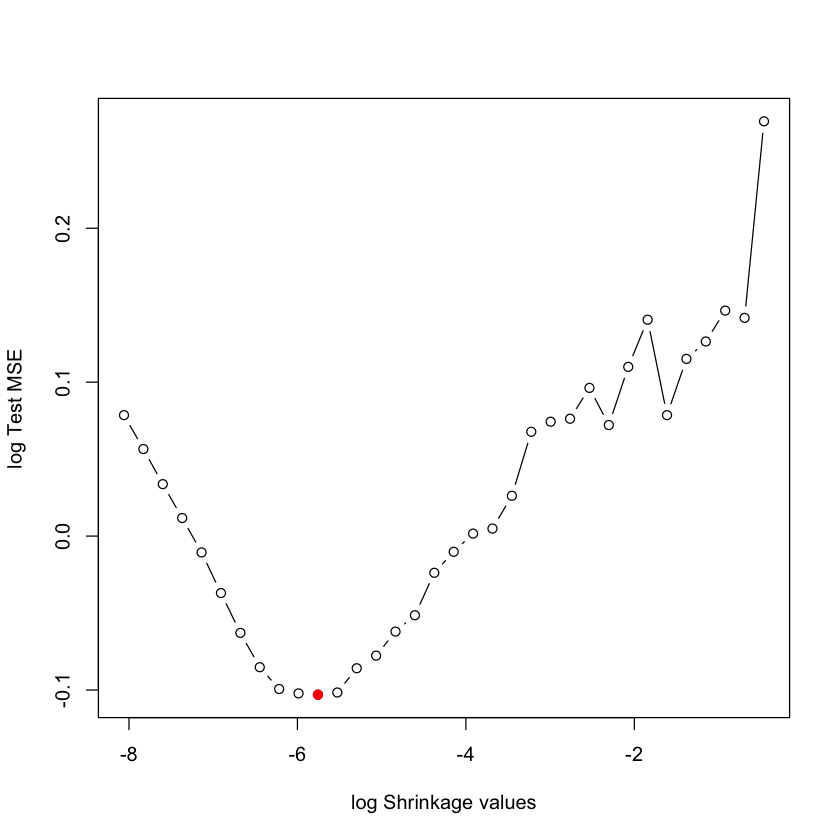

In [20]:
plot(log(lambdas), log(test.err), type="b", xlab="log Shrinkage values", ylab="log Test MSE")
points(log(lambdas[which.min(test.err)]), log(min(test.err)), col="red", pch=19)

In [21]:
min(test.err)
lambdas[which.min(test.err)]

[1] 0.9021147

[1] 0.003162278

-->  The optimal shrinkage is  λ≈0.003

In [22]:
boost.pleas = xgboost(plea.train.x, label = plea.train.y,
                      objective = "reg:linear",
                      eta = 0.003,
                      max_depth = 4,
                      nround = 10000)

[1]	train-rmse:1.126945 
[2]	train-rmse:1.125067 
[3]	train-rmse:1.123196 
[4]	train-rmse:1.121333 
[5]	train-rmse:1.119478 
[6]	train-rmse:1.117629 
[7]	train-rmse:1.115789 
[8]	train-rmse:1.113941 
[9]	train-rmse:1.112115 
[10]	train-rmse:1.110296 
[11]	train-rmse:1.108484 
[12]	train-rmse:1.106665 
[13]	train-rmse:1.104866 
[14]	train-rmse:1.103076 
[15]	train-rmse:1.101292 
[16]	train-rmse:1.099500 
[17]	train-rmse:1.097729 
[18]	train-rmse:1.095965 
[19]	train-rmse:1.094208 
[20]	train-rmse:1.092458 
[21]	train-rmse:1.090714 
[22]	train-rmse:1.088962 
[23]	train-rmse:1.087232 
[24]	train-rmse:1.085508 
[25]	train-rmse:1.083775 
[26]	train-rmse:1.082065 
[27]	train-rmse:1.080364 
[28]	train-rmse:1.078666 
[29]	train-rmse:1.076975 
[30]	train-rmse:1.075294 
[31]	train-rmse:1.073599 
[32]	train-rmse:1.071929 
[33]	train-rmse:1.070264 
[34]	train-rmse:1.068607 
[35]	train-rmse:1.066962 
[36]	train-rmse:1.065323 
[37]	train-rmse:1.063666 
[38]	train-rmse:1.062040 
[39]	train-rmse:1.060

In [23]:
yhat.boost = predict(boost.pleas, plea.test.x)
(mean(yhat.boost -  plea.test.y)^2)



[1] 6.097654e-05

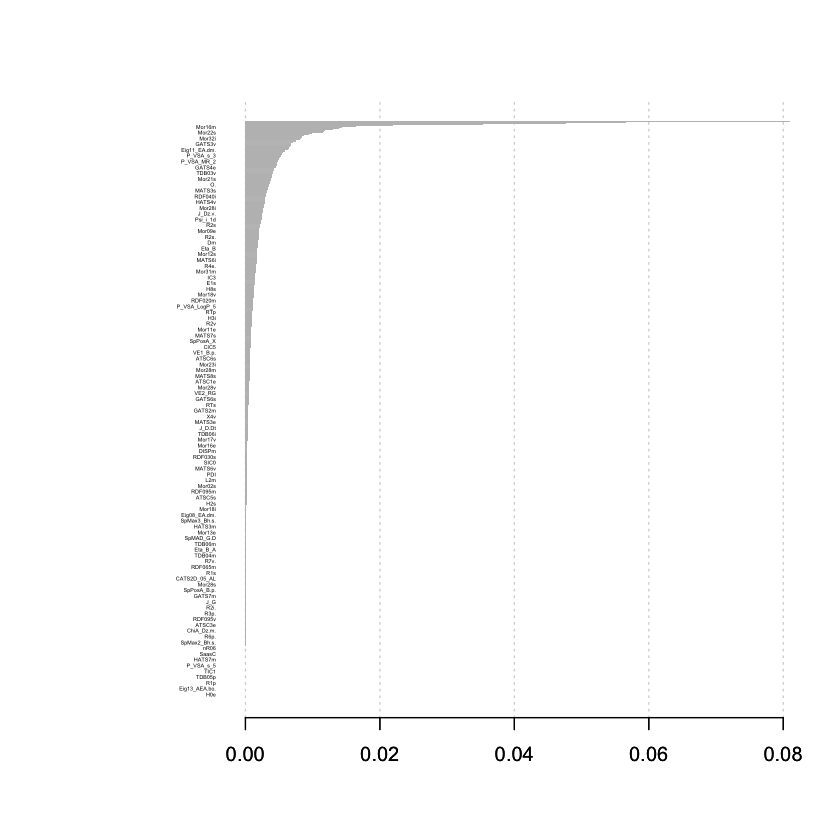

In [35]:
xgb.plot.importance(xgb.importance(model = boost.pleas))

In [25]:
#Random forst
#By default, randomForest() uses p/3 variables when building a random forest of regression trees
library(randomForest)
set.seed(1)

m <- 844 
bag.pleas <- randomForest(pleasantness ~ ., data = data.train, mtry = m/3, ntree = 10000)
pred.bag <- predict(bag.pleas, newdata = data.test)
mean((pred.bag - data.test.y)^2)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




[1] 0.8916383

--> error is larger than the one with boosting : bossting give us the best model. 